# STA 141B Final Project

Our current president loves to talk about climate change. While President Trump's tweets have lately been more focused on what one might consider to be more pressing matters for his administration, Trump has publicly expressed his opinions on climate science no less than 145 times in the past 6 years. 

President Trump's twitter behavior is characterized by two key aspects:

1. There's a seasonal pattern to President Trump's tweets. He appears to focus on climate change when weather is cold.

2. President Trump likes to use the term "global warming", which misrepresents the phenomenon of climate change.

__Are these patterns of behavior unique, or representative of general trends?__

__Some Examples:__

In [1]:
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str
    def _repr_html_(self):
        return self.embed_str
    
address = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">
The concept of global warming was created by and for the Chinese in order to make U.S. 
manufacturing non-competitive.</p>&mdash; Donald J. Trump (@realDonaldTrump) 
<a href="https://twitter.com/realDonaldTrump/status/265895292191248385?ref_src=twsrc%5Etfw">November 6, 2012</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")

In [2]:
Tweet(address)

In [3]:
address = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">
In the East, it could be the COLDEST New Year’s Eve on record. 
Perhaps we could use a little bit of that good old Global Warming that our Country, 
but not other countries, was going to pay TRILLIONS OF DOLLARS to protect against. Bundle up!
</p>&mdash; Donald J. Trump (@realDonaldTrump) 
<a href="https://twitter.com/realDonaldTrump/status/946531657229701120?ref_src=twsrc%5Etfw">
December 29, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")

In [4]:
Tweet(address)

__In this project, I want to address two key questions:__

1. Are there seasonal patterns in public interest towards climate change / global warming?

2. Does the use of the terms "climate change" and "global warming" correlate with attitudes towards climate science? Are those who attempt to cast doubt on climate research more likely to use the term "global warming"?

__Question 1. Are there seasonal patterns in public interest towards climate change / global warming?__

To address this question, I will use two datasets:

1. Google Trends: 10 years of data on the frequency of US Google searches for the terms "climate change" and "global warming".

2. US Mean Monthly Temperature: NOAA data product containing average monthly temperature readings across all climate monitoring stations across the United States.


In [5]:
import pandas as pd
import numpy as np
import datetime
import statsmodels
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import statsmodels.api as sm
import sqlite3
import sqlalchemy

plotly.tools.set_credentials_file(username='ebatzer', api_key='BIJOCGPZqKooZ16thhcw')

%matplotlib inline

gtrends = pd.read_csv("googletrends.csv")
gtrends.columns = ["month", "climate change", "global warming"]
gtrends["month"] = gtrends["month"] + "/01"
gtrends["date_num"] = pd.to_datetime(gtrends["month"], yearfirst = True)
gtrends["total"] = gtrends["climate change"] + gtrends["global warming"]
gtrends["total"] = (gtrends["total"] / max(gtrends["total"])) * 100

# Create traces
data = Data([
    Scatter(
        y = gtrends["global warming"],
        x = gtrends["date_num"],
        marker=Line(
            color = "red"
        ),
        mode='lines',
        name = 'Global Warming',
        showlegend = True),
    Scatter(
        y = gtrends["climate change"],
        x = gtrends["date_num"],
        marker=Line(
            color = "blue"
        ),
        mode='lines',
        name = 'Climate Change',
        showlegend = True)
])

layout = Layout(
    title='Google Searches for "Climate Change" and "Global Warming"',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        ),
        showgrid=False
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        ),
        showgrid=False
    )
)

fig = Figure(data = data, layout = layout)

C:\Users\ebatz\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



__How do Google searches for "Cliamte Change" and "Global Warming" vary over time?__

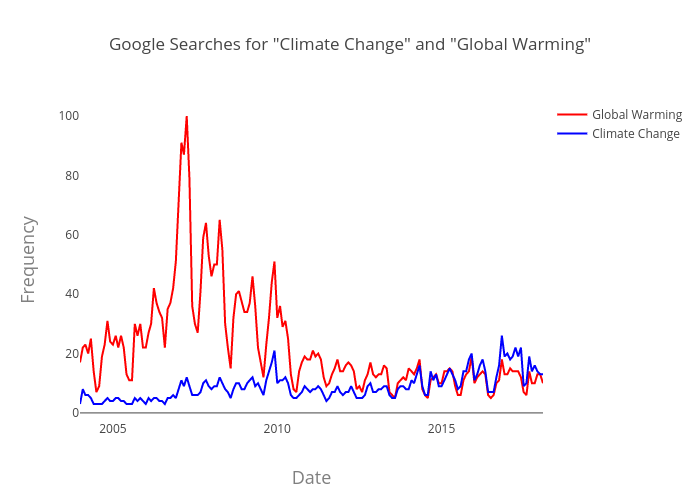

In [6]:
py.image.ishow(fig)

In [7]:
weather = pd.read_csv("NOAAweatherdata.csv", skiprows = 4) 
weather["Month"] = weather["Date"] % 100
weather["Year"] = weather["Date"].apply(str).apply(lambda x: x[:4])
weather["Date"] = weather["Year"] + "/" + weather["Month"].apply(str) + "/01"
weather["date_num"] = pd.to_datetime(weather["Date"], yearfirst = True)
gtrends = pd.merge(gtrends, weather, "inner")

lowess = sm.nonparametric.lowess
ys = lowess( gtrends["total"], pd.to_numeric(gtrends["date_num"]), frac = .3)[:,1]
gtrends['polyfit'] = ys
gtrends['resid'] = gtrends["total"] - gtrends['polyfit']

# Create traces
data = Data([
    Scatter(
        y = gtrends["total"],
        x = gtrends["date_num"],
        marker=Marker(
            size=12,
            cmax=80,
            cmin=30,
            color= gtrends["Value"],
            colorbar=ColorBar(
                title='Mean US Temperature'
            ),
            colorscale='Viridis'
        ),
        mode='lines+markers',
        showlegend = False),
    Scatter(
        y= gtrends["polyfit"],
        x = gtrends["date_num"],
        line=Line(
            color= "black"),
        mode='lines',
        showlegend = False),
])

layout = Layout(
    title='Google Searches for "Climate Change" and "Global Warming"',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            size=18,
            color='#7f7f7f'),
        showgrid=False
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=18,
            color='#7f7f7f'),
        showgrid=False
    )
)

fig = Figure(data = data, layout = layout)

__Are these trends correlated with temperature?__

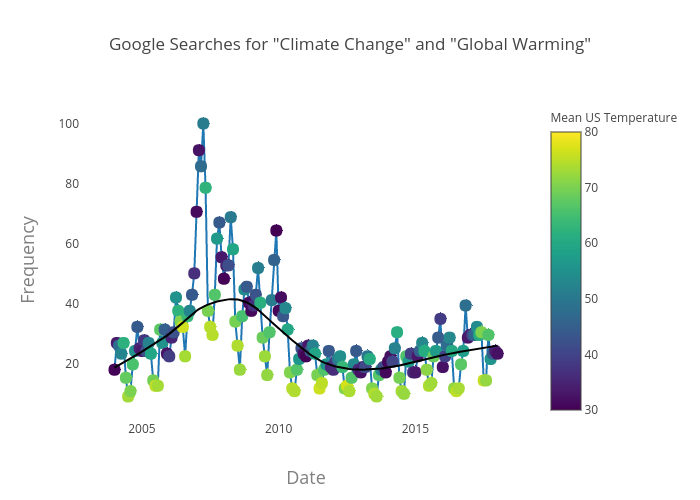

In [8]:
py.image.ishow(fig)

In [9]:
gore_lines = ["2006-05-24","2007-02-26","2007-10-12"]
labels = ['"An Incovenient Truth" Released', 'AIT Wins Best Documentary', 'Al Gore and IPCC win Nobel']

# Create traces
data = Data([
            Scatter(
                y = gtrends["total"],
                x = gtrends["date_num"],
                marker=Marker(
                    size=12,
                    cmax=80,
                    cmin=30,
                    color= gtrends["Value"],
                    colorbar=ColorBar(
                        title='Mean US Temperature'
                    ),
                    colorscale='Viridis'
                ),
                mode='lines+markers',
                showlegend = False),
            Scatter(
                y= gtrends["polyfit"],
                x = gtrends["date_num"],
                line=Line(
                    color= "black"),
                mode='lines',
                showlegend = False),
            Scatter(
                y = [0, 100],
                x = [gore_lines[0], gore_lines[0]],
                mode = "lines",
                line = Line(color = "red"),
                showlegend = False),
            Scatter(
                y = [0, 100],
                x = [gore_lines[1], gore_lines[1]],
                mode = "lines",
                line = Line(color = "red"),
                showlegend = False),
            Scatter(
                y = [0, 100],
                x = [gore_lines[2], gore_lines[2]],
                mode = "lines",
                line = Line(color = "red"),
                showlegend = False)
])

annotations = []

for label, xval, yadj in zip(labels, gore_lines, [0, 20, 40]):
    annotations.append(dict( x=xval, y=100, ay = -yadj,
                                      xanchor='right', yanchor='middle',
                                      text=label,
                                      font=dict(family='Arial',
                                                size=16),
                                      showarrow=True))
    
layout["annotations"] = annotations
fig = Figure(data = data, layout = layout)

__The Gore Effect__

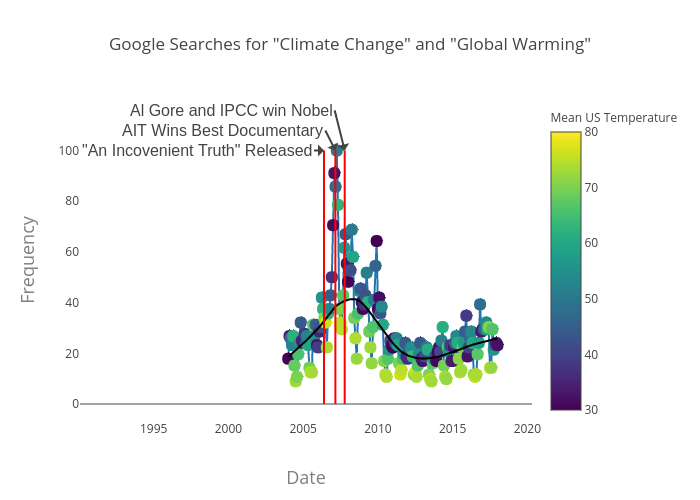

In [10]:
py.image.ishow(fig)

In [11]:
f = np.poly1d(np.polyfit(gtrends["Value"], gtrends["resid"], 2))
predseq = np.linspace(30,80).tolist()
quadfit = f(predseq)

# Create traces
data = Data([
    Scatter(
        y= gtrends["resid"],
        x= gtrends["Value"],
        marker=Marker(
            size=12,
            cmax=80,
            cmin=0,
            color=  gtrends["Value"],
            colorbar=ColorBar(
                title='Temperature (F)'
            ),
            colorscale='Viridis'
        ),
        mode='markers',
        showlegend = False),
    Scatter(
        y = quadfit,
        x = predseq,
        line=Line(
            color= "black"),
        mode='lines',
        showlegend = False)
])


layout = Layout(
    title='LOWESS Residuals',
    xaxis=dict(
        title='Mean US Temperature',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        ),
        showgrid=False
    ),
    yaxis=dict(
        title='Residuals',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        ),
        showgrid=False
    )
)

fig = Figure(data = data, layout = layout)

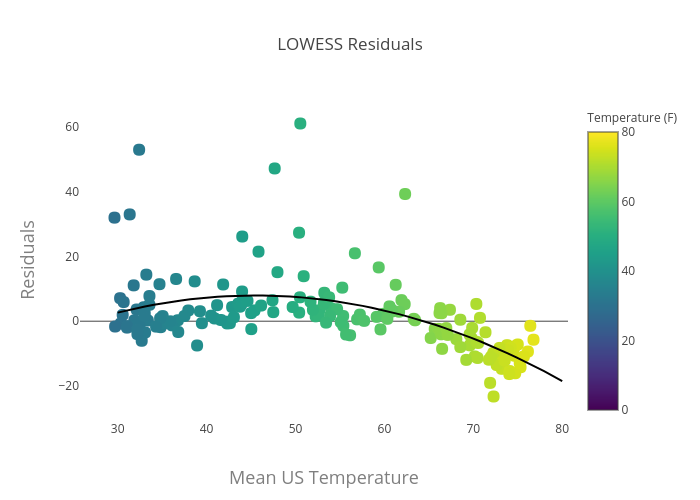

In [12]:
py.image.ishow(fig)


__Question 2: Does the use of the terms "climate change" and "global warming" correlate with attitudes towards climate science?__

Dataset: Reddit submissions containing the terms "climate change" and "global warming".

- Reddit: A content aggregator containing user submitted photos, links, and text posts in distinct communities (subreddits).


- Queried API to retrieve all relevant submissions from January 1st, 2018 to the present, written into an SQL database.


- Resulting dataset contains ~300,000 unique submissions with information on title, community (subreddit), date posted, community score, submission link, submission domain, etc.

Currently, I'm trying to explore this dataset to better understand features of the userbase and forum activity that may influence subsequent analyses.

In [13]:
import requests
import requests_cache
import time

requests_cache.install_cache('reddit_cache')

url = "https://api.pushshift.io/reddit/search/submission/"

# Sets dates - will run for all days between start and end
dstart = datetime.date(2008, 1, 1)
dend = datetime.date(2018, 1, 1)
steps = (dend - dstart).days

# Sets timesteps (start date, the first timestep, and the size between them, in epochs)
t0 = pd.to_numeric(time.mktime(time.strptime("2008/01/01 00:00:00 GMT", "%Y/%m/%d %H:%M:%S %Z")))
t1 = pd.to_numeric(time.mktime(time.strptime("2018/01/01 00:00:00 GMT", "%Y/%m/%d %H:%M:%S %Z")))

# Define the search subs function:
def search_subs(url, searchterm, sub, size, after, before):
    
    # Requests PushShift API
    req = requests.get(url, params = {"title" : searchterm,
                                     "after": after,
                                     "before": before,
                                     "subreddit": sub,
                                     "size": size})

    # Selects data element
    subdata = pd.DataFrame(req.json()['data'])
    
    # Adds identifying columns
    subdata["searchstart"] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(after))
    subdata["searchend"] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(before))
    subdata["keyword"] = searchterm
    
    return(subdata, subdata["created_utc"].iloc[-1])

In [14]:
engine = sqlalchemy.create_engine('sqlite:///subs.db')

# search_utc = int(t0)
# outputdf = dict()
# count = 1

# while search_utc < int(t1) :
#     subs, search_utc = search_subs( 
#             url = url, 
#             searchterm = "climate change", 
#             sub = None, 
#             after = search_utc,
#             before = None,
#             size = 500)
    
#     cols = ["author", "created_utc", "domain", "id", "num_comments",
#            "permalink", "score", "subreddit", "subreddit_id",
#            "title", "url", "searchstart", "searchend", "keyword"]
#     subs = subs[cols]
#     subs.to_sql("cctable", engine, if_exists = "append")
    
#     search_utc = search_utc + 1

#     if count % 25 == 0:
#         print("Current time is %s" % time.strftime('%Y-%m-%d %H:%M:%S',
#                                                    time.localtime(search_utc)))
        
#     count = count + 1
      
#     # Sleep to avoid over-requesting
#     time.sleep(1)

In [15]:
# search_utc = int(t0)
# outputdf = dict()
# count = 1

# while search_utc < int(t1) :
#     subs, search_utc = search_subs( 
#             url = url, 
#             searchterm = "global warming", 
#             sub = None, 
#             after = search_utc,
#             before = None,
#             size = 500)
    
#     cols = ["author", "created_utc", "domain", "id", "num_comments",
#            "permalink", "score", "subreddit", "subreddit_id",
#            "title", "url", "searchstart", "searchend", "keyword"]
#     subs = subs[cols]
#     subs.to_sql("gwtable", engine, if_exists = "append")
    
#     search_utc = search_utc + 1

#     if count % 25 == 0:
#         print("Current time is %s" % time.strftime('%Y-%m-%d %H:%M:%S',
#                                                    time.localtime(search_utc)))
        
#     count = count + 1
      
#     # Sleep to avoid over-requesting
#     time.sleep(1)

In [16]:
gwcounts = pd.read_sql("""SELECT subreddit, COUNT(subreddit) 
FROM gwtable
GROUP BY subreddit
ORDER BY COUNT(subreddit) DESC
""",
               con = engine)

cccounts = pd.read_sql("""SELECT subreddit, COUNT(subreddit) 
FROM cctable
GROUP BY subreddit
ORDER BY COUNT(subreddit) DESC
""",
               con = engine)

authors = pd.read_sql("""SELECT subreddit, COUNT(DISTINCT author) 
FROM gwtable
GROUP BY subreddit
ORDER BY COUNT(DISTINCT author) DESC
""",
               con = engine)

#################################
# Some basic summary statistics #
#################################

gwcounts.columns = ['subreddit', 'gw_counts']
cccounts.columns = ['subreddit', 'cc_counts']
authors.columns = ['subreddit', 'authors']

keywords = pd.merge(gwcounts, cccounts)
keywords = pd.merge(keywords, authors)

keywords["total"] = keywords["cc_counts"] + keywords["gw_counts"]
keywords["gw_frac"] = keywords["gw_counts"] / keywords["total"]
keywords["cc_frac"] = keywords["cc_counts"] / keywords["total"]
keywords["aut_frac"] = keywords["authors"] / keywords["total"]

In [17]:
pd.read_sql("""SELECT * FROM cctable LIMIT 10 """, con = engine)

,index,author,author_flair_css_class,author_flair_text,created_utc,domain,full_link,id,is_self,num_comments,...,permalink,score,subreddit,subreddit_id,thumbnail,title,url,searchstart,searchend,keyword
0,0,[deleted],None,None,1199207397,nytimes.com,https://www.reddit.com/r/reddit.com/comments/6...,649va,0,0,...,/r/reddit.com/comments/649va/youre_in_for_very...,0,reddit.com,t5_6,default,"You’re in for very bad weather. In 2008, you w...",http://www.nytimes.com/2008/01/01/science/01ti...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
1,1,farid3136,None,None,1199261379,advancedengineeringbd.com,https://www.reddit.com/r/science/comments/64be...,64bex,0,0,...,/r/science/comments/64bex/fund_of_50_million_t...,0,science,t5_mouw,default,Fund of $50 Million to Reduce the Impact of Bu...,http://advancedengineeringbd.com/?p=125,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
2,2,[deleted],None,None,1199316976,economist.com,https://www.reddit.com/r/science/comments/64ds...,64dsx,0,0,...,/r/science/comments/64dsx/molten_iron_raining_...,0,science,t5_mouw,default,Molten iron raining down like cowpats; ice flo...,http://www.economist.com/world/international/P...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
3,3,Kimura,None,None,1199343177,wired.com,https://www.reddit.com/r/reddit.com/comments/6...,64eqr,0,2,...,/r/reddit.com/comments/64eqr/clive_thompson_on...,2,reddit.com,t5_6,default,Clive Thompson on How the Next Victim of Clima...,http://www.wired.com/techbiz/people/magazine/1...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
4,4,nognir,None,None,1199377613,theatlantic.com,https://www.reddit.com/r/politics/comments/64g...,64g17,0,0,...,/r/politics/comments/64g17/global_warming_who_...,7,politics,t5_2cneq,default,Global Warming: Who Loses-- And Who Wins? -- ...,http://www.theatlantic.com/doc/200704/global-w...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
5,5,matuszak,None,None,1199381632,blogfishx.blogspot.com,https://www.reddit.com/r/reddit.com/comments/6...,64g9i,0,2,...,/r/reddit.com/comments/64g9i/gravity_is_just_a...,2,reddit.com,t5_6,default,"Gravity is just a theory in rural Oregon, like...",http://blogfishx.blogspot.com/2008/01/gravity-...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
6,6,inghamb87,None,None,1199381931,environmentalgraffiti.com,https://www.reddit.com/r/science/comments/64ga...,64ga5,0,0,...,/r/science/comments/64ga5/trees_are_not_the_an...,5,science,t5_mouw,default,Trees Are Not The Answer To Climate Change,http://www.environmentalgraffiti.com/ecology/t...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
7,7,Celsias,None,None,1199390518,celsias.com,https://www.reddit.com/r/reddit.com/comments/6...,64gqz,0,3,...,/r/reddit.com/comments/64gqz/the_dangerous_thr...,7,reddit.com,t5_6,default,The 'Dangerous Threshold' in Climate Change - ...,http://www.celsias.com/2008/01/03/the-dangerou...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
8,8,alextsai,None,None,1199439232,chinapost.com.tw,https://www.reddit.com/r/reddit.com/comments/6...,64imn,0,0,...,/r/reddit.com/comments/64imn/scientists_hope_f...,0,reddit.com,t5_6,default,Scientists hope frozen mammoth will shed light...,http://www.chinapost.com.tw/headlines/2008/01/...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change
9,9,bobcat,None,None,1199450684,nytimes.com,https://www.reddit.com/r/reddit.com/comments/6...,64izu,0,0,...,/r/reddit.com/comments/64izu/predictions_for_2...,1,reddit.com,t5_6,default,Predictions for 2008 Climate Change - 100 Perc...,http://www.nytimes.com/2008/01/01/science/01ti...,2008-01-01 00:00:00,2018-02-27 13:21:14,climate change


__Are submissions equally divided across different communities?__

In [18]:
trace1 = Scatter(
    x=keywords.sort_values("total", ascending = False)["subreddit"],
    y=np.log(keywords.sort_values("total", ascending = False)["total"]),
    name = "Total"
)

trace2 = Scatter(
    x=keywords.sort_values("cc_counts", ascending = False)["subreddit"],
    y=np.log(keywords.sort_values("cc_counts", ascending = False)["cc_counts"]),
    name = "Climate Change"
)

trace3 = Scatter(
    x=keywords.sort_values("gw_counts", ascending = False)["subreddit"],
    y=np.log(keywords.sort_values("gw_counts", ascending = False)["gw_counts"]),
    name = "Global Warming"
)

fig = plotly.tools.make_subplots(rows=1, cols=3)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)


fig['layout'].update(height=600, width=600, title='Total keyword mentions (log scale)')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



C:\Users\ebatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in log

C:\Users\ebatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning:

divide by zero encountered in log

C:\Users\ebatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning:

divide by zero encountered in log



In [19]:
py.iplot(fig, filename='simple-subplot')

In [20]:
keywords.sort_values("total", ascending = False).iloc[:10,]

,subreddit,gw_counts,cc_counts,authors,total,gw_frac,cc_frac,aut_frac
0,environment,6876,22549,2109,29425,0.233679,0.766321,0.071674
12,EcoInternet,1586,17293,2,18879,0.084009,0.915991,0.000106
2,politics,4343,12488,1800,16831,0.258036,0.741964,0.106946
7,climate,2357,9978,469,12335,0.191082,0.808918,0.038022
3,reddit.com,4148,7340,2316,11488,0.361072,0.638928,0.201602
4,science,4047,6955,1981,11002,0.367842,0.632158,0.180058
1,climateskeptics,4374,4626,526,9000,0.486000,0.514000,0.058444
10,worldnews,2046,6026,960,8072,0.253469,0.746531,0.118930
8,POLITIC,2072,4916,36,6988,0.296508,0.703492,0.005152
6,AskReddit,2811,4107,1784,6918,0.406331,0.593669,0.257878


__Are certain communities dominated by small numbers of users?__

In [21]:
# Create traces
data = Data([
    Scatter(
        y= np.log(keywords.sort_values("total", ascending = False)["total"]),
        x= np.log(keywords.sort_values("total", ascending = False)["authors"]),
        marker=Marker(
            size= np.log(keywords.sort_values("total", ascending = False)["total"]) * 2,
            cmax=1,
            cmin=0,
            color= keywords.sort_values("total", ascending = False)["cc_frac"],
            colorbar=ColorBar(
                title='Climate Change Fraction'
            ),
            colorscale='Viridis'
        ),
        mode='markers',
        name='Markers',
        text=keywords.sort_values("total", ascending = False)["subreddit"],
        textposition='bottom',
        showlegend = False)
])


layout = Layout(
    title='Activity vs. Unique Number of Authors',
    xaxis=dict(
        title='Total Unique Authors (log scale)',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        ),
        showgrid=False
    ),
    yaxis=dict(
        title='Total Number of Posts (log scale)',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        ),
        showgrid=False
    )
)

fig = Figure(data = data, layout = layout)

C:\Users\ebatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

C:\Users\ebatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log

C:\Users\ebatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in log



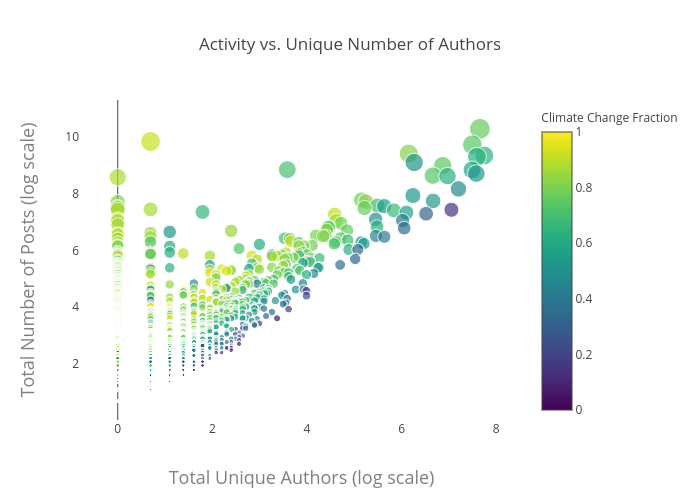

In [22]:
py.image.ishow(fig)

__Which communities talk about climate change the most? Which communities talk about global warming the most?__

In [23]:
cctop5 = keywords[(keywords["total"] > 2000) & (keywords["aut_frac"] > .01)].sort_values("cc_frac", ascending = False).iloc[:5,]
cctop5

,subreddit,gw_counts,cc_counts,authors,total,gw_frac,cc_frac,aut_frac
31,climatechange,383,1884,190,2267,0.168946,0.831054,0.083811
7,climate,2357,9978,469,12335,0.191082,0.808918,0.038022
27,collapse,512,1904,172,2416,0.211921,0.788079,0.071192
0,environment,6876,22549,2109,29425,0.233679,0.766321,0.071674
10,worldnews,2046,6026,960,8072,0.253469,0.746531,0.118930


In [24]:
gwtop5 = keywords[(keywords["total"] > 2000) & (keywords["aut_frac"] > .01)].sort_values("gw_frac", ascending = False).iloc[:5,]
gwtop5

,subreddit,gw_counts,cc_counts,authors,total,gw_frac,cc_frac,aut_frac
11,Showerthoughts,1897,1644,1340,3541,0.535724,0.464276,0.378424
1,climateskeptics,4374,4626,526,9000,0.486000,0.514000,0.058444
15,conspiracy,1338,1462,512,2800,0.477857,0.522143,0.182857
5,askscience,2887,3190,1958,6077,0.475070,0.524930,0.322198
16,explainlikeimfive,1090,1226,785,2316,0.470639,0.529361,0.338946


__Where do these posts come from?__

In [25]:
domaincounts = pd.read_sql("""SELECT domain, COUNT(domain) 
FROM gwtable
GROUP BY domain
ORDER BY COUNT(domain) DESC
""",
               con = engine)

news = domaincounts[~(domaincounts["domain"].str.contains("self.")) &
             ~(domaincounts["domain"] == "reddit.com") & 
             ~(domaincounts["domain"] == "imgur.com") & 
             ~(domaincounts["domain"] == "i.imgur.com") & 
             ~(domaincounts["domain"] == "i.redd.it")]

In [26]:
news.head(10)

,domain,COUNT(domain)
0,youtube.com,2980
4,theguardian.com,1910
10,dailycaller.com,1053
11,nytimes.com,1024
12,washingtonpost.com,939
13,independent.co.uk,905
15,wattsupwiththat.com,830
16,dailymail.co.uk,725
17,thinkprogress.org,664
18,scientificamerican.com,648


__Next Steps:__

Word frequency analysis of submissions containing the term "global warming" vs "climate change".

- Are there certain words that seem most closely associated with each keyword?

If time, produce a binary classifier.

- After removing keywords, is it possible to guess which will be used based on other language in each submission? With what accuracy?

__Implications:__

A better understanding of the discourse surrounding climate change is essential to effectively communicating scientific research.

- Seasonal patterns of interest can indicate when commuication is likely to be most effective, or when greater effort is needed.


- Trends in use of language may suggest how different terms are being used or mischaracterized to drive a narrative, and how this information is disseminated.